In [538]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
    
import numpy as np
import matplotlib.pyplot as plt

import cx_rate
import trials

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


generate a route

In [539]:
route_file = 'route.npz'
T_outbound = 1500
T_inbound = 1500

cx = cx_rate.CXRatePontin(noise=0.1)

#h, v, _ = trials.load_route(filename=route_file)
h, v = trials.generate_route(T=T_outbound)
h, v, log, cpu4_snapshot = trials.run_trial(logging=True,
                                            T_outbound=T_outbound,
                                            T_inbound=T_inbound,
                                            noise=0.0,
                                            cx=cx,
                                            route=(h[:T_outbound], v[:T_outbound]))

Find timestep with biggest motor value soon after turning point

1500

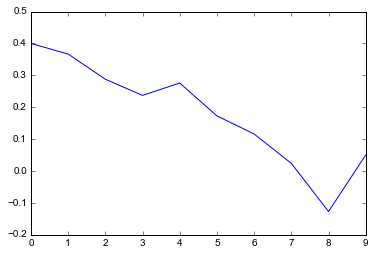

In [540]:
plt.plot(log.motor[T_outbound:T_outbound+10].T)
idx = T_outbound + np.argmax(np.abs(log.motor[T_outbound:T_outbound+10]))
idx

create crude bar charts from snapshot of cell values

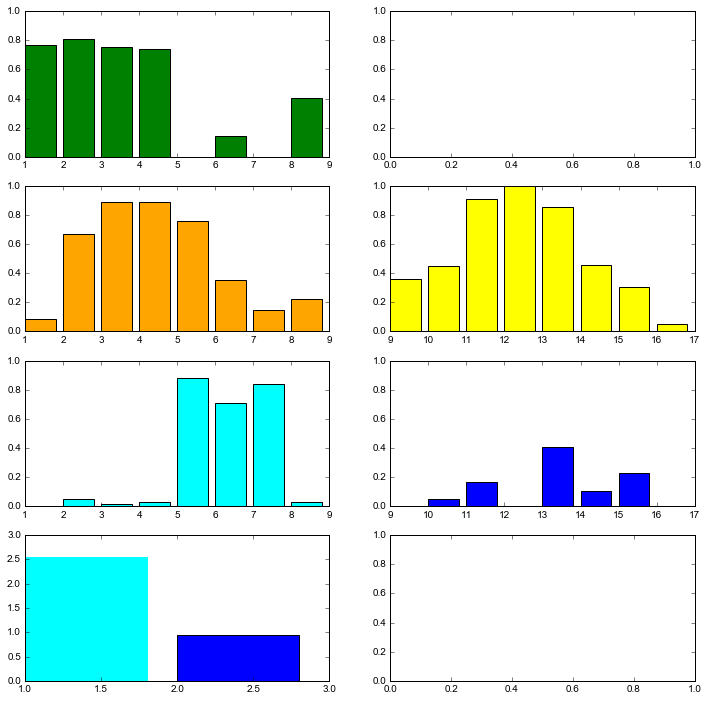

In [543]:
fig, ax = plt.subplots(4,2, figsize =(12,12))

ax[0][0].bar(np.arange(1, 9), log.tb1[:,idx], color='green')
ax[0][0].set_ylim([0, 1])

ax[1][0].bar(np.arange(1, 9), log.cpu4[:8,idx], color='orange')
ax[1][0].set_ylim([0, 1])
ax[1][1].bar(np.arange(9, 17), log.cpu4[8:,idx], color='yellow')
ax[1][1].set_ylim([0, 1])

ax[2][0].bar(np.arange(1, 9), log.cpu1[:8,idx], color='cyan')
ax[2][0].set_ylim([0, 1])
ax[2][1].bar(np.arange(9, 17), log.cpu1[8:,idx], color='blue')
ax[2][1].set_ylim([0, 1])

barlist=ax[3][0].bar([1,2], [np.sum(log.cpu1[:8,idx]), np.sum(log.cpu1[8:,idx])])
barlist[0].set_color('cyan')

Print values

In [542]:
print log.tb1[:,idx]
print log.cpu4[:8,idx]
print log.cpu4[8:,idx]
print log.cpu1[:8,idx]
print log.cpu1[8:,idx]

[ 0.767839    0.80874138  0.75439483  0.74033404  0.          0.14343848
  0.          0.40711491]
[ 0.08217364  0.67203823  0.88641437  0.8895768   0.75872517  0.35136162
  0.14881697  0.22526665]
[ 0.35741035  0.44867     0.90759243  1.          0.85215577  0.45873876
  0.30322     0.0483731 ]
[ 0.          0.04729072  0.0151037   0.02914467  0.87917467  0.7059299
  0.84141117  0.02845308]
[  1.09464238e-04   5.12515252e-02   1.62878727e-01   1.47323764e-03
   4.03574651e-01   1.01240979e-01   2.25633112e-01   0.00000000e+00]
